# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.311609e+01     1.314022e+01
 * time: 0.004626035690307617
     1     6.211736e+01     8.742586e+00
 * time: 0.013751029968261719
     2     5.636764e+01     1.220790e+01
 * time: 0.033479928970336914
     3     3.818397e+01     7.903021e+00
 * time: 0.059623003005981445
     4     2.508074e+01     5.286453e+00
 * time: 0.08466196060180664
     5     1.397971e+01     2.764104e+00
 * time: 0.10651707649230957
     6     1.313098e+01     5.155197e+00
 * time: 0.12168407440185547
     7     1.055885e+01     5.011316e+00
 * time: 0.21531414985656738
     8     9.333027e+00     3.378642e+00
 * time: 0.23577213287353516
     9     7.423878e+00     5.204022e+00
 * time: 0.25505495071411133
    10     7.371611e+00     2.703898e+00
 * time: 0.2696211338043213
    11     6.936734e+00     2.136572e+00
 * time: 0.2841010093688965
    12     6.463401e+00     2.300841e+00
 * time: 0.29814600944519043
    13     6.289018e+00     1.604863e+00
 * tim

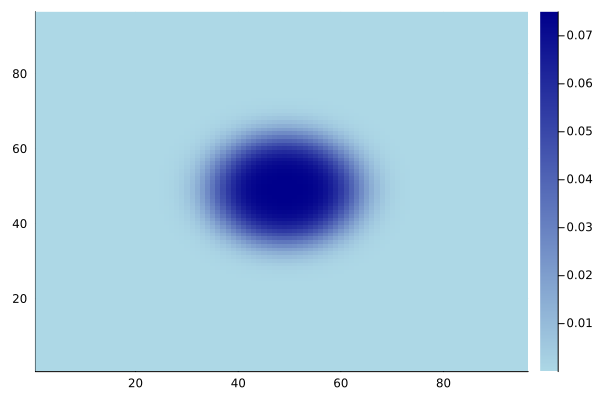

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)